### Importing required libraries

In [46]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

### Importing datasets of five connections

In [47]:
prob = 45

first_dataset = pd.read_csv(f"five_conn/p{prob}/first__connection_topo2_p0{prob}.csv")
second_dataset = pd.read_csv(f"five_conn/p{prob}/second__connection_topo2_p0{prob}.csv")
third_dataset = pd.read_csv(f"five_conn/p{prob}/third__connection_topo2_p0{prob}.csv")
fourth_dataset = pd.read_csv(f"five_conn/p{prob}/fourth__connection_topo2_p0{prob}.csv")
fifth_dataset = pd.read_csv(f"five_conn/p{prob}/fifth__connection_topo2_p0{prob}.csv")

In [48]:
df = pd.concat([first_dataset, second_dataset, third_dataset, fourth_dataset])
dataset = df.copy()

In [49]:
def get_max(train, test, col):
    return max(train[col].max(), test[col].max())

for col in df.columns[80:]:
    max_val = get_max(dataset, fifth_dataset, col)
    df[col] = df[col]/max_val

for col in fifth_dataset.columns[80:]:
    max_val = get_max(dataset, fifth_dataset, col)
    fifth_dataset[col] = fifth_dataset[col]/max_val

In [50]:
df

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,1.000317,1.000000,0.996096,0.996096,0.933436,0.933436,0.931446,0.931446
1,0,0,0,0,0,0,0,0,0,0,...,0,0.3375,1.000314,1.000000,0.986631,0.986631,0.934943,0.934943,0.932078,0.932078
2,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,1.000320,1.000000,0.996089,0.996089,0.933435,0.933435,0.930926,0.930926
3,1,0,0,0,0,0,0,0,0,0,...,0,0.0125,1.000312,1.000000,0.979977,0.979977,0.936011,0.936011,0.932362,0.932362
4,1,0,0,0,0,0,0,0,0,0,...,0,0.3375,1.000318,1.000000,0.986620,0.986620,0.934942,0.934942,0.931335,0.931335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,0.9500,1.000517,0.666668,0.665520,0.665520,0.996906,0.996906,0.899400,0.899400
3236,1,1,1,1,1,1,1,1,1,1,...,1,0.9625,1.000500,0.666668,0.665723,0.665723,0.996868,0.996868,0.901917,0.901917
3237,1,1,1,1,1,1,1,1,1,1,...,1,0.9750,1.000476,0.666668,0.665939,0.665939,0.996832,0.996832,0.905393,0.905393
3238,1,1,1,1,1,1,1,1,1,1,...,1,0.9875,1.000441,0.666668,0.666179,0.666179,0.996797,0.996797,0.910852,0.910852


In [51]:
fifth_dataset

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.5875,1.000314,1.0,0.991751,0.991751,0.934127,0.934127,0.931976,0.931976
1,0,0,0,0,0,1,0,0,0,0,...,0,0.0750,1.000310,1.0,0.981264,0.981264,0.935806,0.935806,0.932787,0.932787
2,0,0,0,0,0,1,0,0,0,0,...,0,0.5875,1.000317,1.0,0.991744,0.991744,0.934126,0.934126,0.931505,0.931505
3,0,0,0,0,0,1,0,0,0,0,...,0,0.0750,1.000313,1.0,0.981255,0.981255,0.935805,0.935805,0.932199,0.932199
4,0,0,0,0,0,1,0,0,0,0,...,0,0.4875,1.000330,1.0,0.989662,0.989662,0.934450,0.934450,0.929243,0.929243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,0.9500,1.001083,1.0,0.997180,0.997180,0.932791,0.932791,0.832140,0.832140
3236,1,1,1,1,1,1,1,1,1,1,...,1,0.9625,1.001057,1.0,0.997502,0.997502,0.932756,0.932756,0.834652,0.834652
3237,1,1,1,1,1,1,1,1,1,1,...,1,0.9750,1.001023,1.0,0.997847,0.997847,0.932723,0.932723,0.838123,0.838123
3238,1,1,1,1,1,1,1,1,1,1,...,1,0.9875,1.000970,1.0,0.998240,0.998240,0.932693,0.932693,0.843573,0.843573


In [52]:
df['pw'] = df['pw']/get_max(dataset, fifth_dataset, col)

In [53]:
fifth_dataset['pw'] = fifth_dataset['pw']/get_max(dataset, fifth_dataset, col)

In [54]:
df.to_csv(f'five_conn/norm/normalized_training_connection_topo_p0{prob}.csv')
fifth_dataset.to_csv(f'five_conn/norm/normalized_test_connection_topo_p0{prob}.csv')


In [55]:
X_train = df.copy()
X_train.drop(X_train.columns[-1:-4:-1], axis=1, inplace=True) #[-1:-6:-1]
y_train = df[df.columns[-1]]

In [56]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,ch,pw,path,s_ase,e_ase,s_osnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8000,0.038294,1.000000,0.996096,0.996096,0.933436
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3375,0.038294,1.000000,0.986631,0.986631,0.934943
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8000,0.038294,1.000000,0.996089,0.996089,0.933435
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0125,0.038294,1.000000,0.979977,0.979977,0.936011
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3375,0.038294,1.000000,0.986620,0.986620,0.934942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9500,0.038302,0.666668,0.665520,0.665520,0.996906
3236,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9625,0.038301,0.666668,0.665723,0.665723,0.996868
3237,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9750,0.038300,0.666668,0.665939,0.665939,0.996832
3238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9875,0.038299,0.666668,0.666179,0.666179,0.996797


In [57]:
X_test = fifth_dataset.copy()
X_test.drop(X_test.columns[-1:-4:-1], axis=1, inplace=True)
y_test = fifth_dataset[fifth_dataset.columns[-1]]

In [58]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12960, 86) (12960,)
(3240, 86) (3240,)


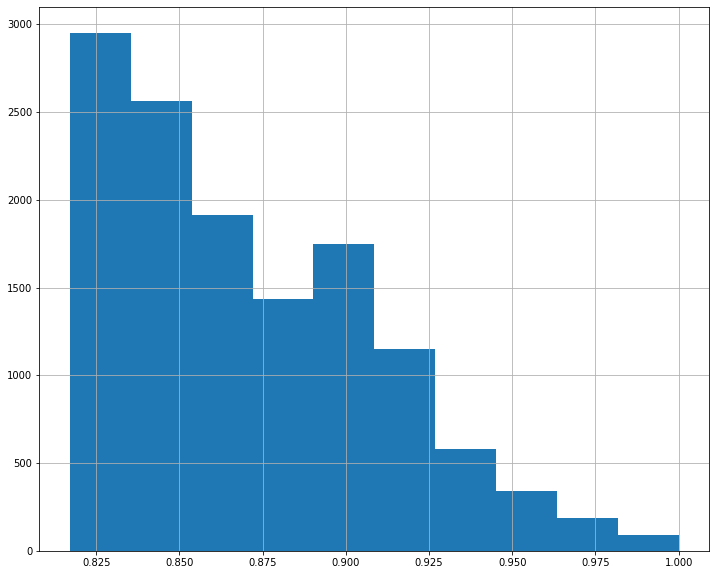

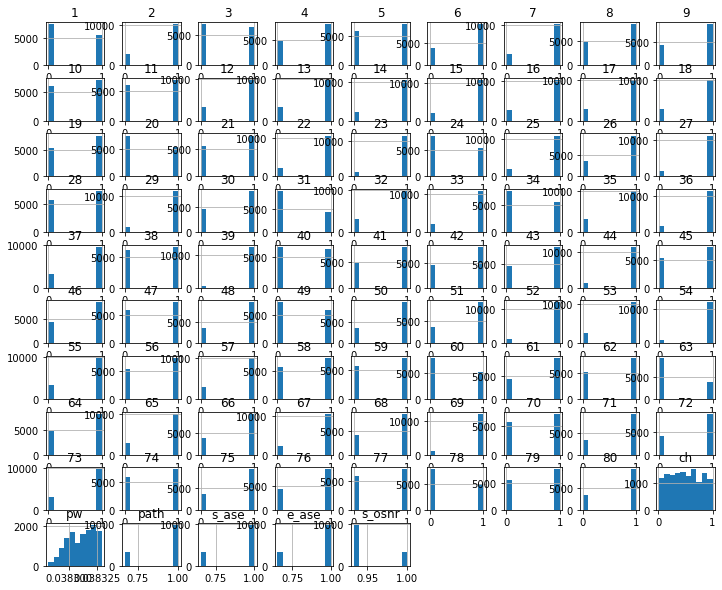

In [59]:
y_train.hist(figsize = (12,10))
X_train.hist(figsize = (12,10))
plt.show()

In [60]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [61]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12960, 86) (12960,)
(3240, 86) (3240,)


### Lasso Model for p={}

In [62]:
C=[100,1000,1500,2000,3000,4000,10000, 12000, 15000, 20000, 25000]
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score


for Ci in C:
    model = Lasso(alpha=1/(2*Ci),max_iter=7000)
    _ = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(f"C = {Ci}")
    print("Training score:", model.score(X_train, y_train))
    print("Testing score:", model.score(X_test, y_test))
    print("MAE of Lasso Regression:", mean_absolute_error(y_test, preds))
    print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, preds)), '\n')
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    # print(f"{Ci} {model.score(Xtest,ytest)}")

C = 100
Training score: 0.7169535867592003
Testing score: -0.5529436352562997
MAE of Lasso Regression: 0.02940284211512282
RMSE of Lasso Regression: 0.0327331734380545 

C = 1000
Training score: 0.888410875965473
Testing score: -1.8916110445160017
MAE of Lasso Regression: 0.040765884594548316
RMSE of Lasso Regression: 0.044666323035626676 

C = 1500
Training score: 0.9098306904913255
Testing score: -1.296859798178335
MAE of Lasso Regression: 0.03589503699122675
RMSE of Lasso Regression: 0.039808655346018636 

C = 2000
Training score: 0.9184766581085515
Testing score: -0.7866591982290974
MAE of Lasso Regression: 0.031414041727651075
RMSE of Lasso Regression: 0.03511002388073354 

C = 3000
Training score: 0.9260719713785698
Testing score: -0.18510167347678474
MAE of Lasso Regression: 0.025113999166067175
RMSE of Lasso Regression: 0.028594866332445155 

C = 4000
Training score: 0.9291899071969029
Testing score: 0.12248271196460925
MAE of Lasso Regression: 0.021269665205179325
RMSE of Lass

### Ridge Model for p = .32

In [63]:
C=[5,10,50,100,1000,1500,2000,3000,4000,10000]
for Ci in C:
    ridge = Ridge(alpha=1/(2*Ci),max_iter=10000)
    _ = ridge.fit(X_train,y_train)
    pred_train_lr= ridge.predict(X_test)
    print(f"C = {Ci}")
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    print("Training score:", ridge.score(X_train, y_train))
    print("Testing score:", ridge.score(X_test, y_test))
    print("MAE of Lasso Regression:", mean_absolute_error(y_test, pred_train_lr))
    print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, pred_train_lr)), '\n')


C = 5
Training score: 0.9344353074429701
Testing score: 0.8324663103037877
MAE of Lasso Regression: 0.008571156716221903
RMSE of Lasso Regression: 0.010751308944933407 

C = 10
Training score: 0.9346874987925745
Testing score: 0.834017314637022
MAE of Lasso Regression: 0.008527958871678938
RMSE of Lasso Regression: 0.010701426139374066 

C = 50
Training score: 0.9357711711519103
Testing score: 0.840351002241631
MAE of Lasso Regression: 0.008355203079094988
RMSE of Lasso Regression: 0.010495263901452044 

C = 100
Training score: 0.9362674091661041
Testing score: 0.8439675894465816
MAE of Lasso Regression: 0.0082562933281206
RMSE of Lasso Regression: 0.010375706399700146 

C = 1000
Training score: 0.937554692545842
Testing score: 0.8528313513001246
MAE of Lasso Regression: 0.008008327233563473
RMSE of Lasso Regression: 0.010076690419382554 

C = 1500
Training score: 0.9380103659453487
Testing score: 0.8543160676040936
MAE of Lasso Regression: 0.00796626545410773
RMSE of Lasso Regression:

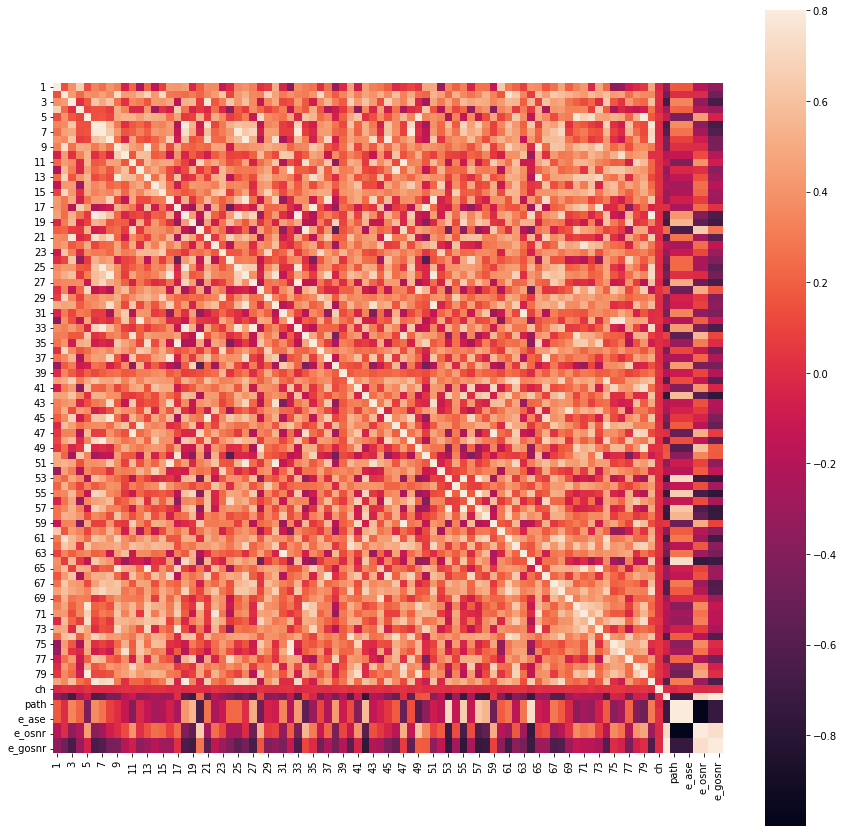

In [64]:
Cx = dataset.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(Cx, vmax = .8, square = True)
plt.show()

### RandomForest Model for p=.32

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

estimators=[100, 200, 300, 1000]
for  Ei in estimators:
    print(f"Estimator - {Ei}")
    model = RandomForestRegressor(n_estimators=Ei)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    MAE = mean_absolute_error(y_test , predicted)
    print('Random forest validation MAE = ', MAE)
    # Display accuracy score
    print(f'Random forest accuracy = ', model.score(X_test, y_test))
    print(f'RMSE forest = ', np.sqrt(mean_squared_error(y_test , predicted)))

Estimator - 100
Random forest validation MAE =  0.0068417754699967494
Random forest accuracy =  0.8360488247381307
RMSE forest =  0.010635735594058579
Estimator - 200
Random forest validation MAE =  0.0077794769393607684
Random forest accuracy =  0.7828683294360066
RMSE forest =  0.012239730402011605
Estimator - 300
Random forest validation MAE =  0.007484528870303029
Random forest accuracy =  0.7976111387501893
RMSE forest =  0.011816900221456431
Estimator - 1000
Random forest validation MAE =  0.0077741646752323345
Random forest accuracy =  0.7839960942972992
RMSE forest =  0.01220790292114494


### LinearRegression Model for p=.32


In [66]:
# LINEARREGRESSION MODEL 

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train) 
print("accuracy score for linear: ", linear.score(X_test,y_test))
print("RMSE for linear :",np.sqrt(mean_squared_error(y_test,linear.predict(X_test))))
r2_score(y_test,linear.predict(X_test))

accuracy score for linear:  0.980321978619656
RMSE for linear : 0.003684690198631395


0.980321978619656

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

model = RandomForestRegressor()
model.fit(X_train, y_train)
predicted_prices = model.predict(X_test)
MAE = mean_absolute_error(y_test , predicted_prices)
print('Random forest validation MAE = ', MAE)
# Display accuracy score
print(f'Random forest accuracy = ', model.score(X_test, y_test))
print(f'RMSE forest = ', np.sqrt(mean_squared_error(y_test , predicted_prices)))

Random forest validation MAE =  0.007692542601953647
Random forest accuracy =  0.7834601323076849
RMSE forest =  0.012223039032319024
